In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

### Reference: Influence of hole shape on sound absorption of underwater anechoic layers
#### https://www.sciencedirect.com/science/article/abs/pii/S0022460X1830227X

### Import pre-defined class and function

In [4]:
plt.close('all')

In [5]:
%run -i hole_shape_sound_absorption_v2.py

## Define an object of sound_performance for calculating sound absorption
### The default values are listed as below (all in SI units)

Material of anechoic layer: rubber

Young's modulus of rubber (GPa): 0.14

Loss factor of rubber 0.23

Poisson ratio of rubber 0.49

Density of rubber (kg/m3): 1100

Density of air (kg/m3): 1.21

Shape: cone

p = 4 mm

q = 8 mm

lh = 40 mm

cell_radius = 15 mm

num_segments = 100

Density of water (kg/m3): 998

Sound speed of water (m/s): 1483

#### https://en.wikipedia.org/wiki/Lam%C3%A9_parameters

### Define the frequency array by np.arange

In [6]:
frequency_array = np.arange(10, 10052, 100)
# frequency_array2 = np.arange(2, 10022, 20)
frequency_array.shape

(101,)

In [7]:
# hole_sound = sound_performance(frequency_array)

### Example 01-1: use effective radius and precise wavenumber

Calculating absorption for all frequencies:   0%|          | 0/101 [00:00<?, ?it/s]

Save file to /Users/chenghunglin/Documents/sound_absorption_test/horn_1_7_rad.xlsx


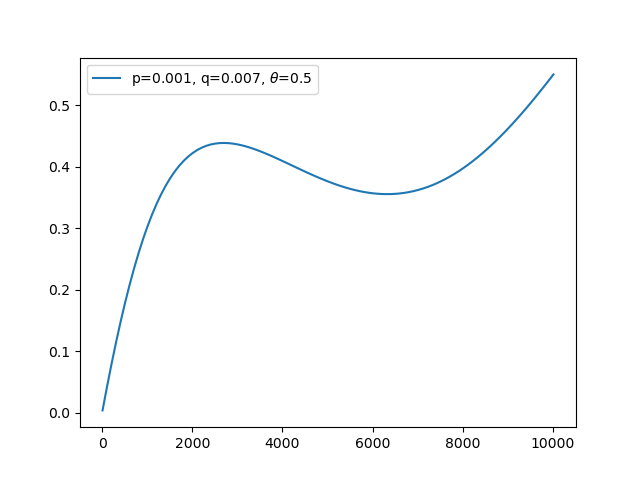

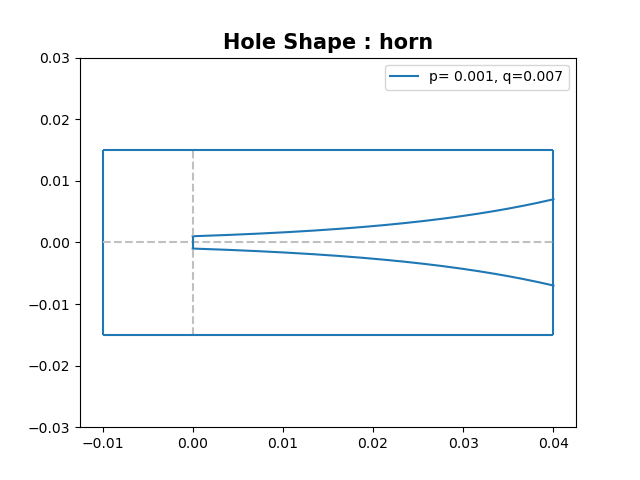

In [8]:
horn_1_7_rad = anechoic_sound_absorption(frequency_array,
                              fp = '/Users/chenghunglin/Documents/sound_absorption_test/', 
                              fn = 'horn_1_7_rad.xlsx', 
                              material='rubber', shape='horn', 
                              p=1e-3, q=7e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=1000, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=False)
plt.show()

In [9]:
csv_fn = '/Users/chenghunglin/Documents/sound_absorption_test/horn_1_7_FEM.csv'
horn_1_7_FEM = pd.read_csv(csv_fn, sep=',', names=['frq', 'abs'], skiprows=1)

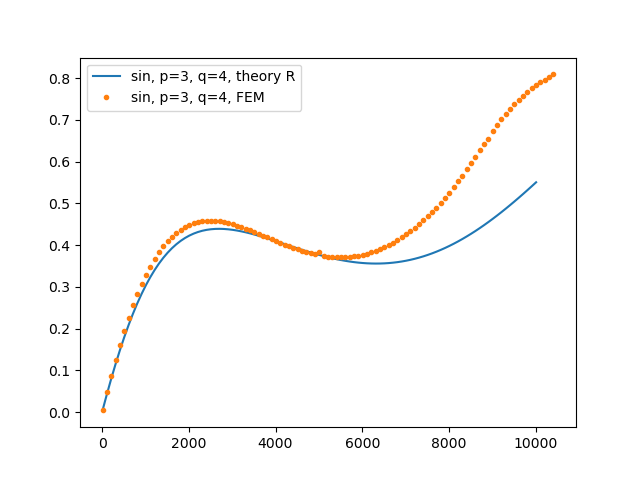

In [15]:
plt.figure()
plt.plot(horn_1_7_rad.frequency_array, horn_1_7_rad.absorption_array, label='sin, p=3, q=4, theory R')
plt.plot(horn_1_7_FEM['frq']*1000, horn_1_7_FEM['abs'], '.', label='sin, p=3, q=4, FEM')
# plt.plot(cone_4_8_3.frequency_array, cone_4_8_3.absorption_frequency(), '--', color='orange', label='cone, p=4, q=8, Young=0.014 Gpa')
# plt.plot(horn_1_11.frequency_array, horn_1_11.absorption_frequency(), label='horn, p=1, q=11, seg=50, fr=50')
# plt.plot(horn_1_11_seg100.frequency_array, horn_1_11_seg100.absorption_frequency(), label='horn, p=1, q=11, seg=100, fr=50')
# plt.plot(horn_1_11_fr20.frequency_array, horn_1_11_fr20.absorption_frequency(), label='horn, p=1, q=11, seg=100, fr=20')
plt.legend()

### Example 01-2: use precise volume and precise wavenumber

In [ ]:
sin_3_4_05_vol = anechoic_sound_absorption(frequency_array,
                              fp = '/Users/chenghunglin/Documents/', 
                              fn = 'sin_3_4_05_vol.xlsx', 
                              material='rubber', shape='sin', 
                              p=3e-3, q=4e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=1000, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=True)
plt.show()

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_array, label='sin, p=3, q=4, theory V')
plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_array, label='sin, p=3, q=4, theory R')
plt.plot(sin_3_4_05_FEM['frq']*1000, sin_3_4_05_FEM['abs'], '-', label='sin, p=3, q=4, FEM')
plt.legend()

### Example 01-2: compare finer frequency & segment steps

In [ ]:
# frequency_array = np.arange(2, 10052, 50)

In [ ]:
sin_3_4_05_vol_2 = anechoic_sound_absorption(determinant, frequency_array,
                              fp = '/Users/chenghunglin/Documents/', 
                              fn = 'sin_3_4_05_vol_2.xlsx', 
                              material='rubber', shape='sin', 
                              p=3e-3, q=4e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=200, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=True)

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, vol')
plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, rad')
plt.plot(sin_3_4_05_vol_2.frequency_array, sin_3_4_05_vol_2.absorption_frequency(), label='sin, p=3, q=4, fr50, seg200, vol')
# plt.plot(horn_1_11.frequency_array, horn_1_11.absorption_frequency(), label='horn, p=1, q=11, volume')
plt.legend()

In [ ]:
frequency_array = np.arange(2, 10052, 50)

In [ ]:
sin_3_4_05_vol_3 = anechoic_sound_absorption(determinant, frequency_array,
                              fp = '/Users/chenghunglin/Documents/', 
                              fn = 'sin_3_4_05_vol_3.xlsx', 
                              material='rubber', shape='sin', 
                              p=3e-3, q=4e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=100, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=True)

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, vol')
# plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, rad')
plt.plot(sin_3_4_05_vol_2.frequency_array, sin_3_4_05_vol_2.absorption_frequency(), label='sin, p=3, q=4, fr50, seg200, vol')
plt.plot(sin_3_4_05_vol_3.frequency_array, sin_3_4_05_vol_3.absorption_frequency(), label='sin, p=3, q=4, fr50, seg100, vol')
plt.legend()

In [ ]:
frequency_array = np.arange(2, 10052, 100)

In [ ]:
sin_3_4_05_vol_4 = anechoic_sound_absorption(determinant, frequency_array,
                              fp = '/Users/chenghunglin/Documents/', 
                              fn = 'sin_3_4_05_vol_4.xlsx', 
                              material='rubber', shape='sin', 
                              p=3e-3, q=4e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=200, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=True)

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, vol')
# plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, rad')
plt.plot(sin_3_4_05_vol_2.frequency_array, sin_3_4_05_vol_2.absorption_frequency(), label='sin, p=3, q=4, fr50, seg200, vol')
plt.plot(sin_3_4_05_vol_3.frequency_array, sin_3_4_05_vol_3.absorption_frequency(), label='sin, p=3, q=4, fr50, seg100, vol')
plt.plot(sin_3_4_05_vol_4.frequency_array, sin_3_4_05_vol_4.absorption_frequency(), label='sin, p=3, q=4, fr100, seg200, vol')
plt.legend()

In [ ]:
csv_fn = '/Users/chenghunglin/Documents/sin_3_4_05_FEM.csv'
sin_3_4_05_FEM = pd.read_csv(csv_fn, sep=',', names=['frq', 'abs'], skiprows=1)

In [ ]:
sin_3_4_05_FEM

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, volume')
# plt.plot(sin_3_4_05_vol_2.frequency_array, sin_3_4_05_vol_2.absorption_frequency(), label='sin, p=3, q=4, fr50, seg200, vol')
plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, radius')
plt.plot(sin_3_4_05_FEM['frq']*1000, sin_3_4_05_FEM['abs'], '-', label='sin, p=3, q=4, FEM')
plt.legend()

In [ ]:
frequency_array = np.arange(2, 10052, 100)

In [ ]:
sin_3_4_05_vol_5 = anechoic_sound_absorption(determinant, frequency_array,
                              fp = '/Users/chenghunglin/Documents/', 
                              fn = 'sin_3_4_05_vol_5.xlsx', 
                              material='rubber', shape='sin', 
                              p=3e-3, q=4e-3, lh=40e-3, cell_radius=15e-3, 
                              theta=0.5, phi=3e-3, length_unit='m',
                              num_segments=500, layer_density=1100, air_density=1.21, 
                              Young_modulus=0.14e9, Poisson_ratio=0.49, loss_factor=0.23, 
                              medium_density=998, sound_speed_medium=1483, 
                              use_volume=True)

In [ ]:
plt.figure()
plt.plot(sin_3_4_05_vol.frequency_array, sin_3_4_05_vol.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, volume')
plt.plot(sin_3_4_05_rad.frequency_array, sin_3_4_05_rad.absorption_frequency(), label='sin, p=3, q=4, fr100, seg100, radius')
plt.plot(sin_3_4_05_vol_5.frequency_array, sin_3_4_05_vol_5.absorption_frequency(), label='sin, p=3, q=4, fr100, seg500, volume')
plt.plot(sin_3_4_05_FEM['frq']*1000, sin_3_4_05_FEM['abs'], '-', label='sin, p=3, q=4, FEM')
plt.legend()